In [39]:
import tensorflow as tf
import pandas as pd                                         # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                                          # linear algebra
from tensorflow.keras.models import Sequential              # model type
from tensorflow.keras.layers import Dense, Dropout          # dense layer, dropout layer
from tensorflow.keras.activations import relu, sigmoid      # activation functions
from tensorflow.keras.optimizers import SGD                 # stochastic gradient descent
from tensorflow.keras.losses import binary_crossentropy     # cost function

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/FRAUD_DETECTION.csv')
df

<ipython-input-41-5b66cbb67606>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/FRAUD_DETECTION.csv')


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,0,0.00,0.00,0,0
1,390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,0,0.00,0.00,0,0
2,393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,0,0.00,0.00,0,0
3,397,1,CASH_IN,349640.51,C1493042329,1023111.71,1372752.22,0,0.00,0.00,0,0
4,398,1,CASH_IN,135324.19,C1751403001,1372752.22,1508076.41,0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1922277,6362242,718,DEBIT,2609.21,C1546763667,5070.00,2460.79,C1242258329,144193.72,146802.93,0,0
1922278,6362247,718,DEBIT,2063.08,C397492133,328612.00,326548.92,C1557979171,1312720.98,1314784.06,0,0
1922279,6362254,718,DEBIT,425.65,C1835928822,4046.00,3620.35,C701975669,3009282.73,3009708.38,0,0
1922280,6362303,718,DEBIT,2148.99,C1909103796,49632.00,47483.01,C1931871221,66241.39,68390.38,0,0


In [42]:
df.isnull().sum()

Unnamed: 0             0
step                   0
type                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest          158404
oldbalanceDest         0
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922282 entries, 0 to 1922281
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   step            int64  
 2   type            object 
 3   amount          float64
 4   nameOrig        object 
 5   oldbalanceOrg   float64
 6   newbalanceOrig  float64
 7   nameDest        object 
 8   oldbalanceDest  float64
 9   newbalanceDest  float64
 10  isFraud         int64  
 11  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 176.0+ MB


In [44]:
df=df.drop(['Unnamed: 0'],axis=1)

In [45]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,0,0.00,0.00,0,0
1,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,0,0.00,0.00,0,0
2,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,0,0.00,0.00,0,0
3,1,CASH_IN,349640.51,C1493042329,1023111.71,1372752.22,0,0.00,0.00,0,0
4,1,CASH_IN,135324.19,C1751403001,1372752.22,1508076.41,0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1922277,718,DEBIT,2609.21,C1546763667,5070.00,2460.79,C1242258329,144193.72,146802.93,0,0
1922278,718,DEBIT,2063.08,C397492133,328612.00,326548.92,C1557979171,1312720.98,1314784.06,0,0
1922279,718,DEBIT,425.65,C1835928822,4046.00,3620.35,C701975669,3009282.73,3009708.38,0,0
1922280,718,DEBIT,2148.99,C1909103796,49632.00,47483.01,C1931871221,66241.39,68390.38,0,0


In [46]:
cat_columns = df.select_dtypes(include='object').columns
cat_columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [47]:
num_columns = df.select_dtypes(include=np.number).columns
df[num_columns]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,143236.26,0.00,143236.26,0.00,0.00,0,0
1,1,228451.89,143236.26,371688.15,0.00,0.00,0,0
2,1,65912.95,640544.28,706457.23,0.00,0.00,0,0
3,1,349640.51,1023111.71,1372752.22,0.00,0.00,0,0
4,1,135324.19,1372752.22,1508076.41,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
1922277,718,2609.21,5070.00,2460.79,144193.72,146802.93,0,0
1922278,718,2063.08,328612.00,326548.92,1312720.98,1314784.06,0,0
1922279,718,425.65,4046.00,3620.35,3009282.73,3009708.38,0,0
1922280,718,2148.99,49632.00,47483.01,66241.39,68390.38,0,0


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [49]:
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df['isFraud']
smote = SMOTE()

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['type']),
        ('num', StandardScaler(), num_columns[:-2])
    ])

p = Pipeline(steps=[('preprocessor', preprocessor)])

In [51]:
Xp = p.fit_transform(X)
Xp.shape

(1922282, 10)

In [52]:
Xp, y = smote.fit_resample(Xp, y)
Xp.shape, y.shape

((3836380, 10), (3836380,))

#### Create a Neural Network

In [53]:
model= Sequential()
model.add(Dense(units=512, activation=relu, input_shape=(Xp.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units=8, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation=relu))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation=sigmoid))

In [54]:
# optimizer is stochastic gradient descent, which is a good default optimizer, for more info see https://keras.io/api/optimizers/sgd/
model.compile(
    optimizer=SGD(),
    loss=binary_crossentropy,
    metrics=['accuracy', 'Precision', 'Recall']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               5632      
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)               

In [55]:
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3069104, 10), (767276, 10), (3069104,), (767276,))

In [56]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1, shuffle=True)

Epoch 1/10
76728/76728 [==============================] - 478s 6ms/step - loss: 0.6930 - accuracy: 0.5001 - precision: 0.4998 - recall: 0.4567 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
76728/76728 [==============================] - 464s 6ms/step - loss: 0.6930 - accuracy: 0.5000 - precision: 0.4997 - recall: 0.4600 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
76728/76728 [==============================] - 463s 6ms/step - loss: 0.6930 - accuracy: 0.5005 - precision: 0.5002 - recall: 0.4923 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10
76728/76728 [==============================] - 463s 6ms/step - loss: 0.6930 - accuracy: 0.5001 - precision: 0.4998 - recall: 0.4673 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
76728/76728 [==============================] - 449s 6ms/step 

In [57]:
model.evaluate(X_test, y_test)

23978/23978 [==============================] - 51s 2ms/step - loss: 0.6932 - accuracy: 0.5009 - precision: 0.5009 - recall: 1.0000


[0.6932026147842407, 0.5008575916290283, 0.5008575916290283, 1.0]

23978/23978 [==============================] - 41s 2ms/step


<Axes: >

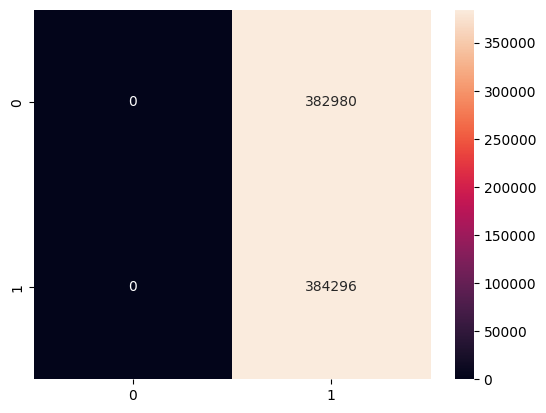

In [58]:
import seaborn as sns
# heatmap
ypred = model.predict(X_test)
ypred = ypred > 0.5
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')

In [59]:
print(classification_report(y_test, ypred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    382980
           1       0.50      1.00      0.67    384296

    accuracy                           0.50    767276
   macro avg       0.25      0.50      0.33    767276
weighted avg       0.25      0.50      0.33    767276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Save the model

In [60]:
from joblib import dump
model.save('ANN_M2_L9.h5')
dump(p, 'ANN_M2_L9_PP.jb')

['ann_fraud_detection_preprocessor.jb']

#### Load the model and preprocessor

In [61]:
from joblib import load
def load_model():
    model = tf.keras.models.load_model('ANN_M2_L9.h5')
    return model

def load_preprocessor():
    p = load('ANN_M2_L9_PP.jb')
    return p

In [62]:
existing_model = load_model()
p = load_preprocessor()
existing_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               5632      
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)               

In [63]:
def predict_fraud(model, data):
    data = p.transform(data)
    prediction = model.predict(data)
    return prediction

In [64]:
data = pd.DataFrame({
    'step': [1],
    'type': ['CASH_OUT'],
    'amount': [1000],
    'name_orig': ['C123450428'],
    'oldbalanceOrg': [1000],
    'newbalanceOrig': [0],
    'name_dest': ['M123451249'],
    'oldbalanceDest': [0],
    'newbalanceDest': [0],
})

out = predict_fraud(existing_model, data)
print(out[0][0] > 0.5)

1/1 [==============================] - 0s 118ms/step
True
